# Import Train Data

In [1]:
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/train_data/train_labels.csv")
df

,img_id,object_count_gt,handwritten_count_gt,anomalies_bbox_gt
0,1001,80,80,[]
1,1002,6,6,[]
2,1003,51,52,"[('black_spot', [67, 44, 27, 16])]"
3,1004,24,24,[]
4,1005,77,77,[]
...,...,...,...,...
111,1112,200,-1,[]
112,1113,200,-1,[]
113,1114,198,-1,[]
114,1115,200,-1,[]


# Anomalies
There are 2 kinds (only 1 of each in the train dataset):
1. Double Stacking - Overlapping of 2 chips, you SHOULD include the overlapped chip in your object count
2. Black Dots - Black dots that appear on some chips. you SHOULD NOT include chips with black dots in your object count

The following cases are not counted as anomalies and SHOULD be counted as a regular chip:
1. Defects or Breaks
2. Black Expoxy Glue

In [3]:
# only 1 of each anomaly in the train dataset

df['anomalies_bbox_gt'].value_counts()

[]                                        114
[('double_stack', [590, 226, 48, 38])]      1
[('black_spot', [67, 44, 27, 16])]          1
Name: anomalies_bbox_gt, dtype: int64

### Double Stacking

In [4]:
# Double stacking
df.loc[df.img_id == 1048]

,img_id,object_count_gt,handwritten_count_gt,anomalies_bbox_gt
47,1048,98,97,"[('double_stack', [590, 226, 48, 38])]"


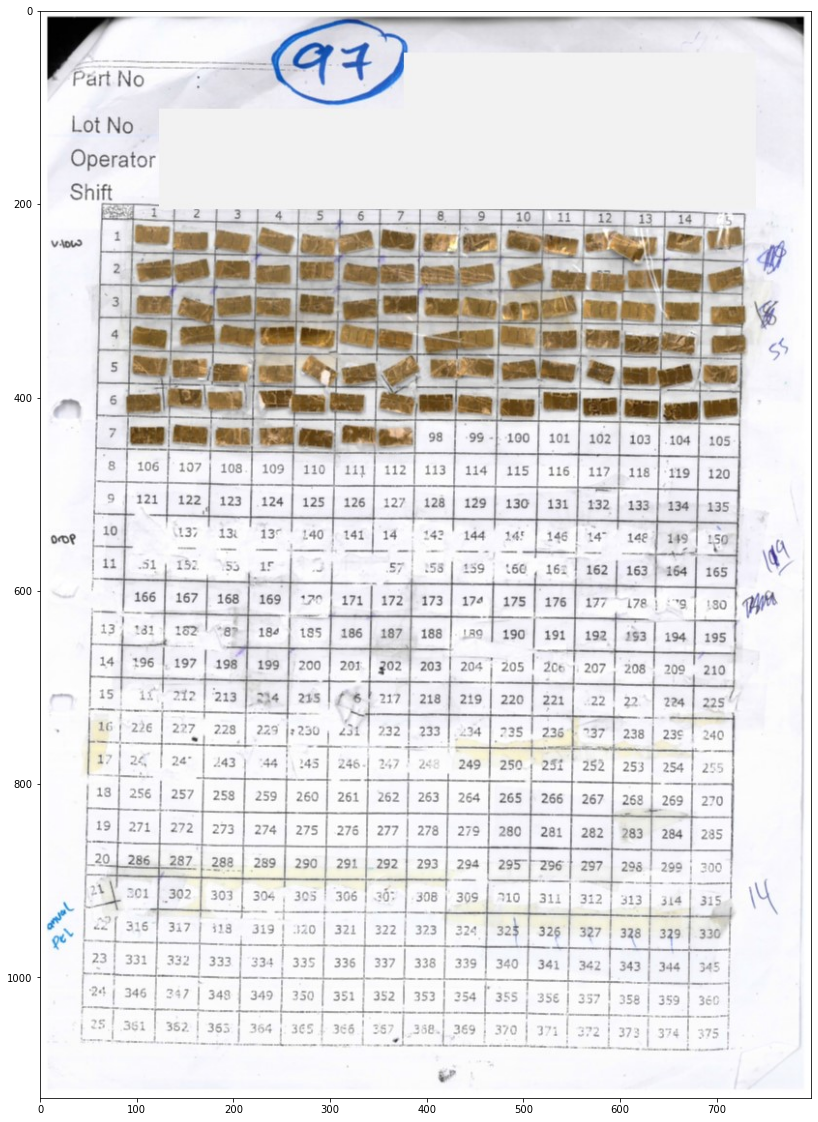

In [5]:
ds_img = cv.imread("dataset/train_data/train_images/1048.jpg")
ds_img_RGB = cv.cvtColor(ds_img, cv.COLOR_BGR2RGB)

plt.figure(figsize = (20,20))
plt.imshow(ds_img_RGB)

### Black Dot 

In [6]:
# Black spot
df.loc[df.img_id == 1003]

,img_id,object_count_gt,handwritten_count_gt,anomalies_bbox_gt
2,1003,51,52,"[('black_spot', [67, 44, 27, 16])]"


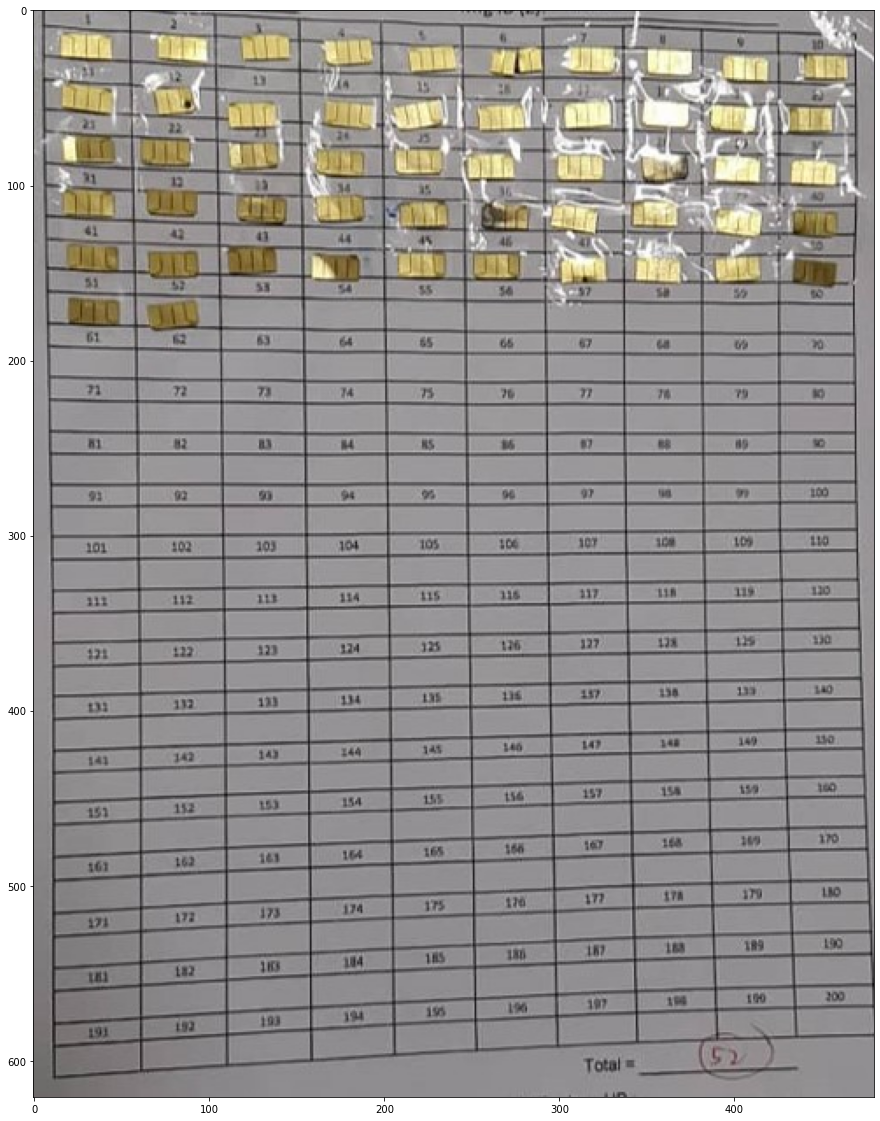

In [7]:
bd_img = cv.imread("dataset/train_data/train_images/1003.jpg")
bd_img_RGB = cv.cvtColor(bd_img, cv.COLOR_BGR2RGB)

plt.figure(figsize = (20,20))
plt.imshow(bd_img_RGB)